In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
df=pd.read_csv(r'C:\Everything\Coding\datasets\Netflix_Cleaned_Dataset.csv')

In [206]:
# Total Number of Titles in the datset

total_titles=df['Show_id'].count()
print()
print("Total Number of Titles : ",total_titles)
print()


Total Number of Titles :  8807



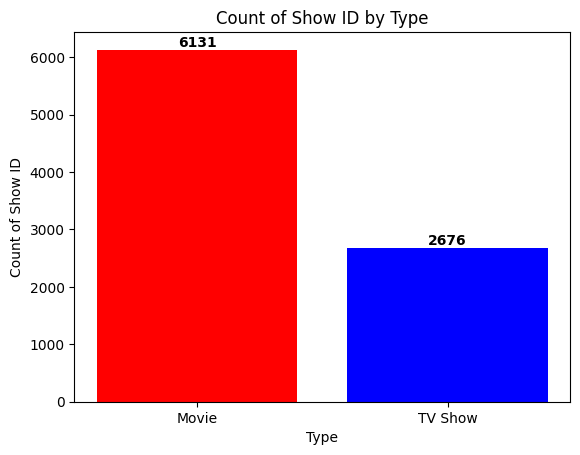

In [207]:
# Number of Shows per Type

group_type=pd.DataFrame(df.groupby('Type')['Show_id'].count()).reset_index()
group_type
bars=plt.bar(x=group_type['Type'],height=group_type['Show_id'],color=['red','blue'])
plt.bar_label(bars,labels=group_type['Show_id'],fontsize=10,color='black',fontweight='bold')
plt.xlabel('Type')
plt.ylabel('Count of Show ID')
plt.title('Count of Show ID by Type')
plt.show()

# Among those two Types Movies has more titles than TV Show

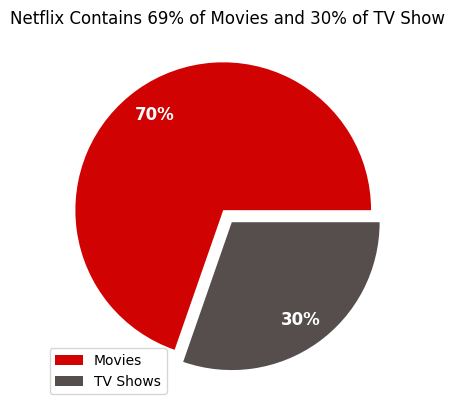

In [208]:
# Percentage of movies/TV shows from total number of titles

movie_percent=str((6131/total_titles)*100)[:4]
tv_show_percent=str((2676/total_titles)*100)[:4]
colors=['#D00202', '#564d4d']
datas=np.array([movie_percent,tv_show_percent])
labels=['Movies','TV Shows']
explodes=(0.05,0.05)
plt.pie(datas,labels=labels,colors=colors,pctdistance=0.80,explode=explodes,autopct='%1.0f%%',textprops={'color':'white','weight':'bold','fontsize':12})
plt.legend(labels=labels,loc='lower left')
plt.title("Netflix Contains "+movie_percent[:2]+"%"+" of Movies and "+tv_show_percent[:2]+"%"+" of TV Show")
plt.show()

In [209]:
df.head()

,Unnamed: 0,Show_id,Type,Title,Director,Main Actor,Country,Netflix_release,Release_year,Rating,Duration,Genres,Description
0,0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unspecified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,1,2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,2,3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
3,3,4,TV Show,Jailbirds New Orleans,Unspecified,Unspecified,United States,"September 24, 2021",2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo..."
4,4,5,TV Show,Kota Factory,Unspecified,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...


In [210]:
# Fetching The number of ratings given per Type 

rating_per_type = pd.DataFrame(df.groupby(['Rating','Type'])['Show_id'].count())
rating_per_type[3:]

Show_id
Rating   Type            
G        Movie         41
NC-17    Movie          3
NR       Movie         75
         TV Show        5
PG       Movie        287
         TV Show        1
PG-13    Movie        492
         TV Show        1
R        Movie        797
         TV Show        2
TV-14    Movie       1427
         TV Show      733
TV-G     Movie        126
         TV Show       94
TV-MA    Movie       2062
         TV Show     1145
TV-PG    Movie        540
         TV Show      323
TV-Y     Movie        131
         TV Show      176
TV-Y7    Movie        139
         TV Show      195
TV-Y7-FV Movie          5
         TV Show        1
UR       Movie          3

In [211]:
# Fetching Top 5 Genres per Type 
df_genre=pd.DataFrame(df.groupby('Genres')['Show_id'].count()).reset_index()
df_genre=df_genre.sort_values('Show_id',ascending=False).head(5)


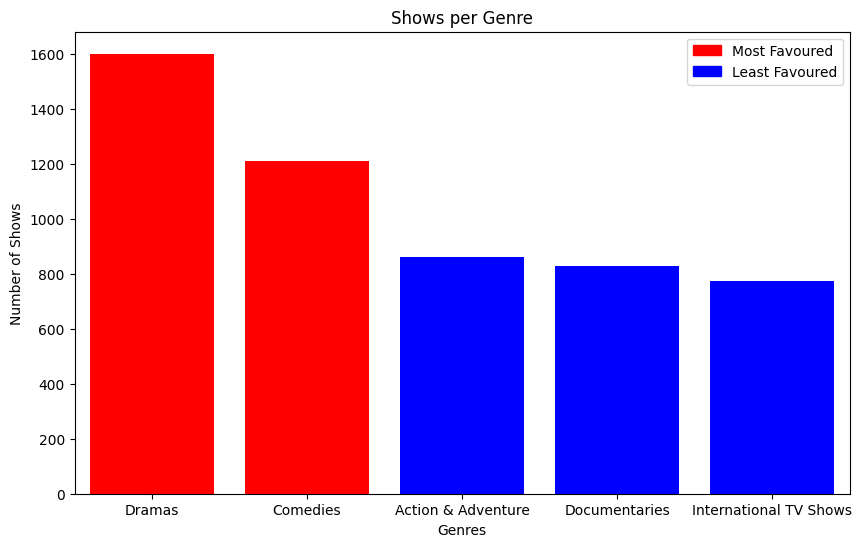

In [212]:
# Visualising the Above Question

plt.figure(figsize=(10,6))
plots=sns.barplot(x='Genres',y='Show_id',data=df_genre)
colors=['red','red','blue','blue','blue']
#plt.xticks(rotation=30)
plots.set_xlabel('Genres')
plots.set_ylabel('Number of Shows')
plots.set_title('Shows per Genre')
plt.legend(labels,loc='lower right')
for i,bar in enumerate(plots.patches):
    bar.set_facecolor(colors[i])
from matplotlib.patches import Patch
color_label=['red','blue']
labels=['Most Favoured','Least Favoured']
legend_labels=[Patch(color=color,label=label) for color,label in zip(color_label,labels)]
plt.legend(handles=legend_labels,loc='upper right')

# Among this Dramas and Comedies are most favoured than other Genres in both Movies/TV Shows

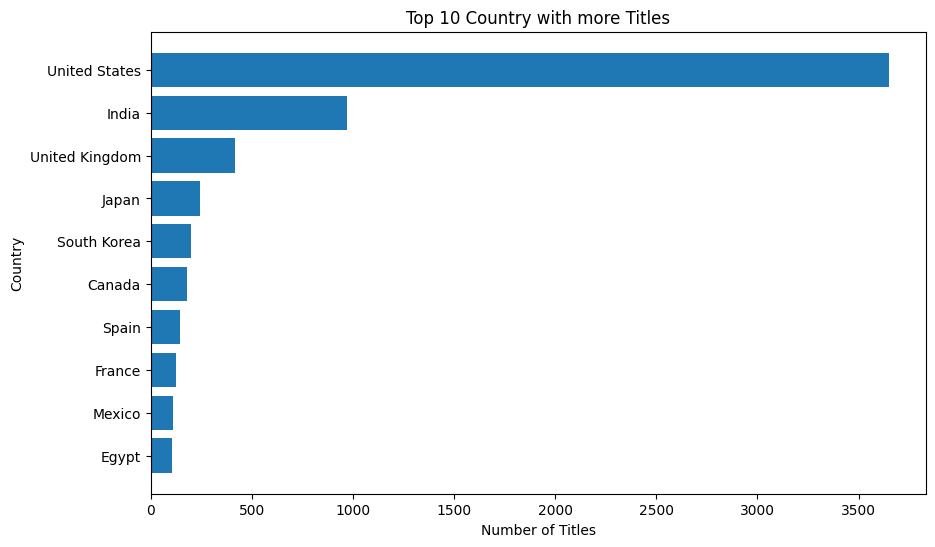

In [213]:
# Numbers which has more titles

df_country_titles=df.groupby('Country')['Show_id'].count().reset_index()
df_country_titles.columns=['Country','No_of_titles']

# To get only one Country

df_country_titles['Country']=df_country_titles['Country'].str.split(',').str[-1]
df_country_titles=df_country_titles.sort_values(by='No_of_titles',ascending=False).head(10)
df_country_titles=df_country_titles.sort_values(by='No_of_titles',ascending=True)
plt.figure(figsize=(10,6))
plt.barh(df_country_titles['Country'],df_country_titles['No_of_titles'])
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.title('Top 10 Country with more Titles')
plt.show()

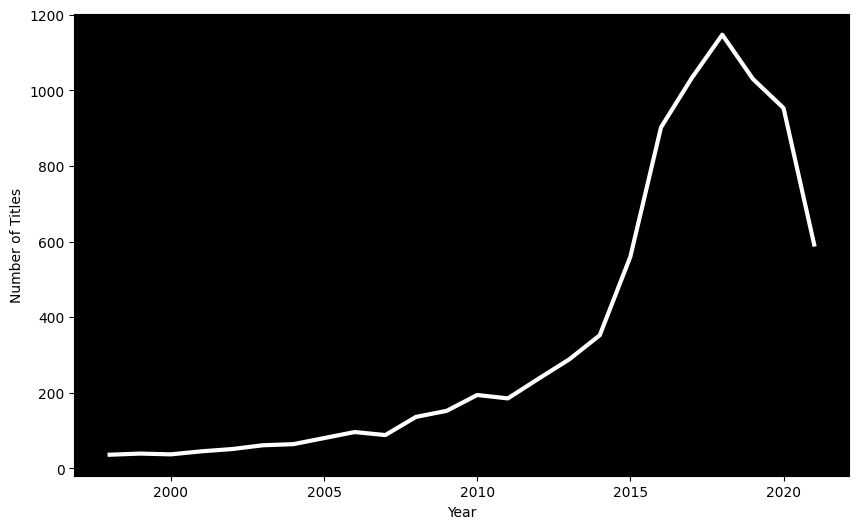

In [214]:
# Timeline on how many titles have released in netflix after 1997 till now based on the dataset

df_timeline=df.groupby('Release_year')['Show_id'].count().reset_index()
df_timeline.columns=['Year','Number of Titles']

df_timeline=df_timeline[df_timeline['Year']>1997]
plt.figure(figsize=(10,6))
plt.plot(df_timeline['Year'],df_timeline['Number of Titles'],lw=3,color='white')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.gca().set_facecolor('black')

# This implies that  after 2010 there is a drastic change in number of titles

C:\Users\Mathi priyan\AppData\Local\Temp\ipykernel_6160\886191525.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_director.colums=['Director','Number of Titles']


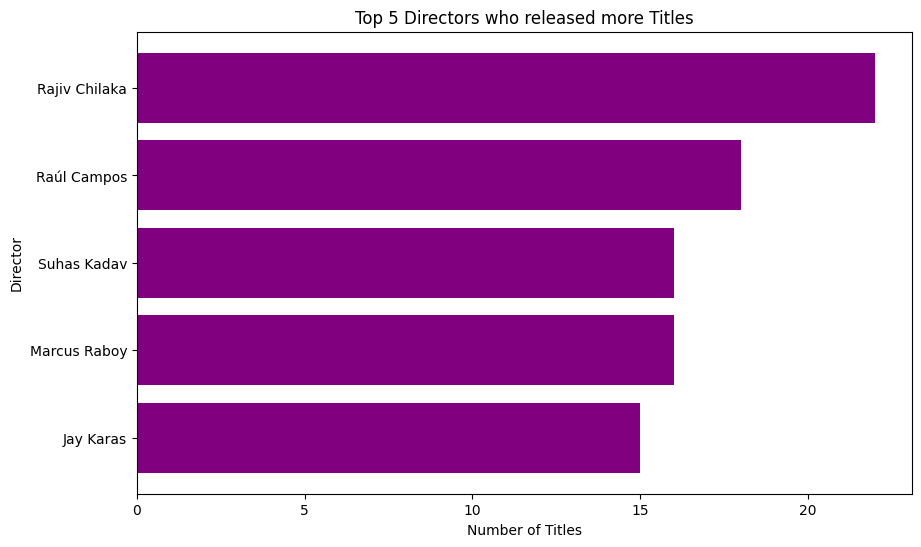

In [215]:
df_director=df.groupby('Director')['Show_id'].count().reset_index()
df_director.colums=['Director','Number of Titles']

df_director=df_director.sort_values(by=['Show_id','Director'],ascending=False).head(6).iloc[1:6]
df_director=df_director.sort_values(by=['Show_id','Director'],ascending=True)
plt.figure(figsize=(10,6))
plt.barh(df_director['Director'],df_director['Show_id'],color='purple')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.title('Top 5 Directors who released more Titles')
plt.show()

Text(0.5, 1.0, 'Titles released per month')

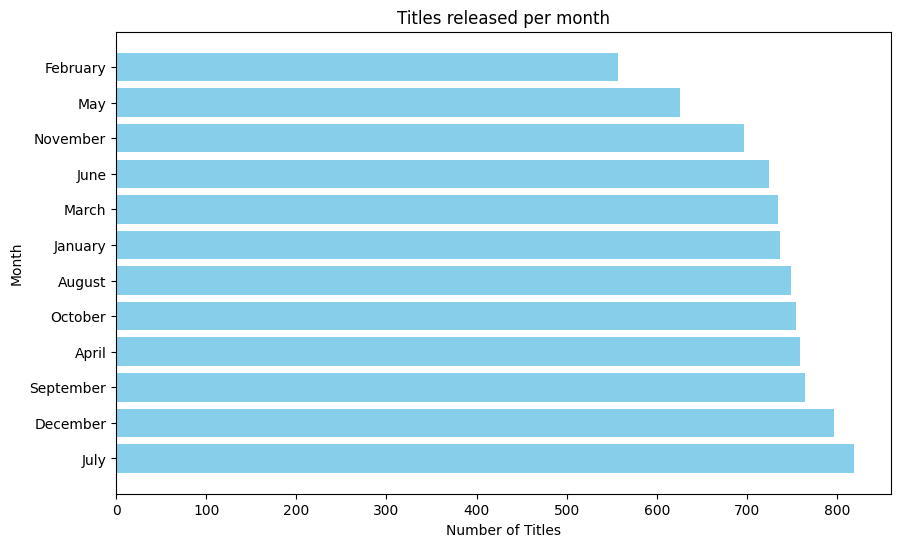

In [216]:
import re
df1 = df.copy()

# Extract the month from the 'Netflix_release' column, handling missing or non-matching values
df1['Netflix_release']=df['Netflix_release'].str.split(',').str[0]
df1['Netflix_release'] = df1['Netflix_release'].apply(lambda x: re.search('^[a-zA-Z]+', x).group() if pd.notnull(x) and re.search('^[a-zA-Z]+', x) else x)
df1
df_month_trends=df1.groupby('Netflix_release')['Show_id'].count().reset_index()
df_month_trends['Netflix_release'] = df_month_trends['Netflix_release'].str.split().str[0]
df_month_trends['Netflix_release']=df_month_trends['Netflix_release'].str.strip()
df_month_trends=df_month_trends.sort_values(by='Show_id',ascending=False)
plt.figure(figsize=(10,6))
plt.barh(df_month_trends['Netflix_release'],df_month_trends['Show_id'],color='skyblue')
plt.xlabel('Number of Titles')
plt.ylabel('Month')
plt.title('Titles released per month')


# From this most of the titles are released in july month and least is february

In [217]:
# Average Duration of All Movies

duration_list=df1[df1['Type']=='Movie']
duration_list['Duration']=df['Duration'].str.split().str[0]
duration_list=duration_list['Duration']
duration_list=duration_list.apply(lambda x:int(x))
avg_duration=np.average(duration_list)
print()
print("Average Duration of a Movie : %.0f minutes"%avg_duration)
print()


Average Duration of a Movie : 100 minutes



C:\Users\Mathi priyan\AppData\Local\Temp\ipykernel_6160\2737429788.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_list['Duration']=df['Duration'].str.split().str[0]


In [218]:
# Most Titles released data in repeated Day

title_mode=df['Netflix_release'].mode()[0]
print()
print("Most Commmon release Date : ",title_mode)
print()


Most Commmon release Date :  January 1, 2020

